""" Created: 15-Apr-2021

@author: Deb """

""" Scrapping Glassdoor data and performing Data Wrangling on it

"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('salary_data_cleaned_1.csv')

In [10]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Python_R,Spark,SAS,Cloud,Excel,job_simplifier,seniority,State,desc_len,comp_cnt
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,1,0,1,data scientist,na,NM,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,data scientist,na,MD,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,1,1,0,1,data scientist,na,FL,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,data scientist,na,WA,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,1,1,1,data scientist,na,NY,2728,3


## Split source data into two parts -- dataframe with numeric fields & dataframe with character fields

## Description of the numerical variables

In [4]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
Company_txt           object
same_state             int64
Age                    int64
Python_R               int64
Spark                  int64
SAS                    int64
Cloud                  int64
Excel                  int64
job_simplifier        object
seniority             object
State                 object
desc_len               int64
comp_cnt               int64
dtype: object

In [11]:
df_num = df.select_dtypes(include=[np.number])

In [15]:
df_num.columns.values

array(['Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'same_state', 'Age', 'Python_R',
       'Spark', 'SAS', 'Cloud', 'Excel', 'desc_len', 'comp_cnt'],
      dtype=object)

In [18]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Company_txt', 'job_simplifier',
       'seniority', 'State'],
      dtype='object')

In [19]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,Age,Python_R,Spark,SAS,Cloud,Excel,desc_len,comp_cnt
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.556604,0.225067,0.117251,0.223720,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.497121,0.417908,0.321936,0.417017,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [8]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'same_state', 'Age', 'Python_R', 'Spark', 'SAS', 'Cloud',
       'Excel', 'job_simplifier', 'seniority', 'State', 'desc_len',
       'comp_cnt'],
      dtype='object')

## Histogram on important variables to check if data are normally distributed

array([[<AxesSubplot:title={'center':'min_salary'}>,
        <AxesSubplot:title={'center':'max_salary'}>,
        <AxesSubplot:title={'center':'avg_salary'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'comp_cnt'}>],
       [<AxesSubplot:title={'center':'desc_len'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

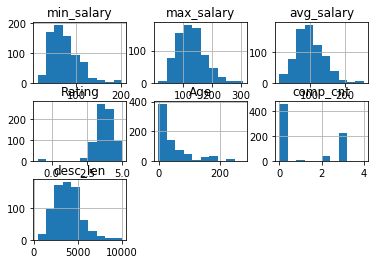

In [13]:
df[['min_salary','max_salary','avg_salary','Rating','Age', 'comp_cnt', 'desc_len']].hist()

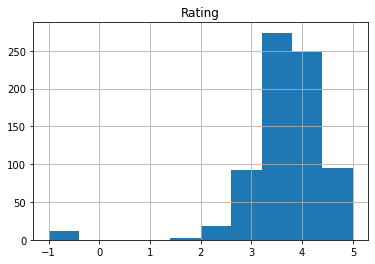

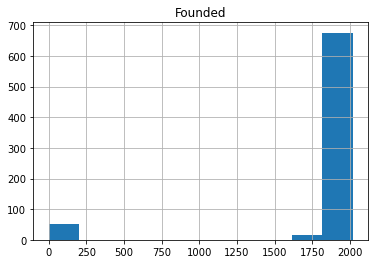

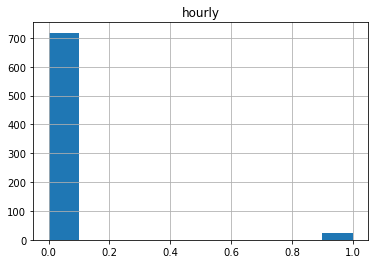

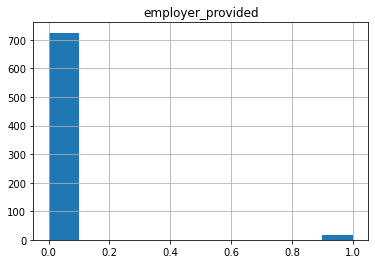

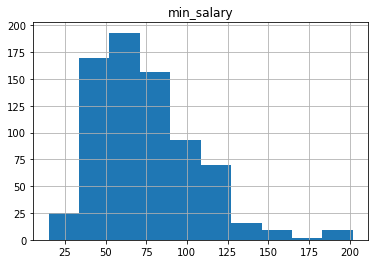

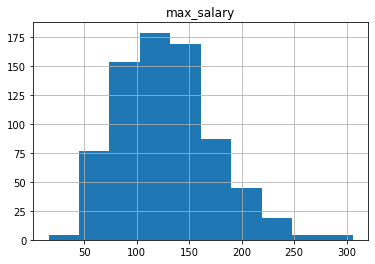

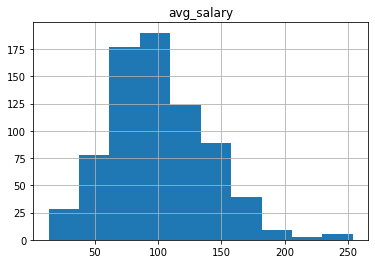

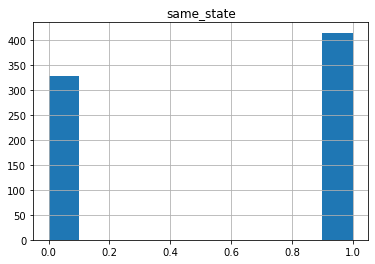

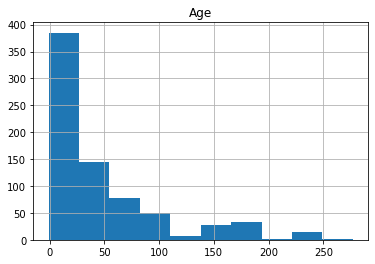

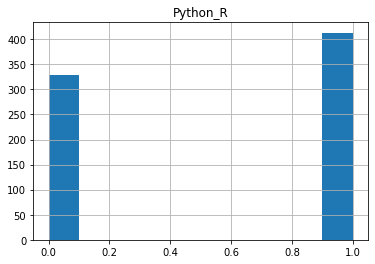

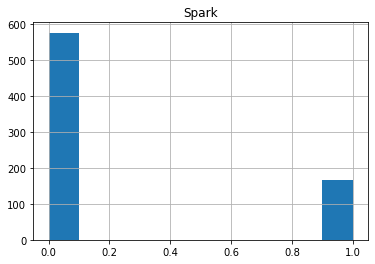

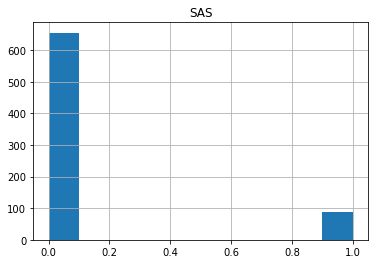

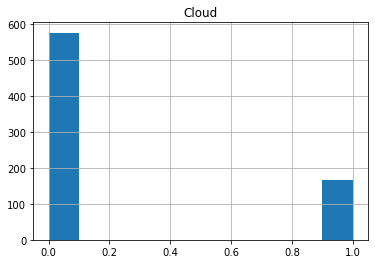

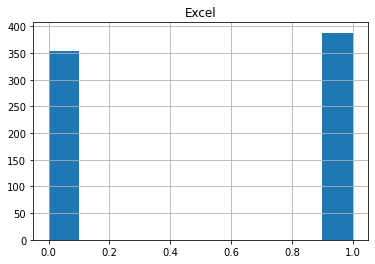

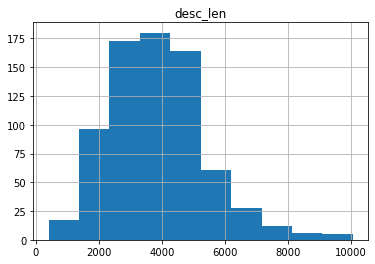

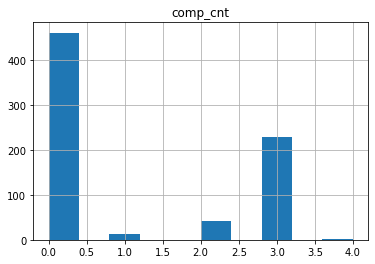

In [21]:
for i in df_num.columns:
    df_num[[i]].hist()

## Boxplot to check outliers and data distribution

<AxesSubplot:>

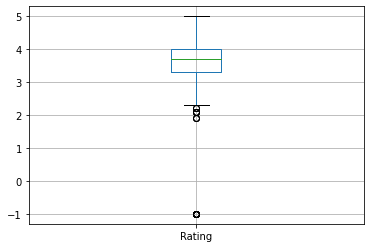

In [14]:
df.boxplot(column = ['Rating'])

In [28]:
df_num.columns.values

array(['Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'same_state', 'Age', 'Python_R',
       'Spark', 'SAS', 'Cloud', 'Excel', 'desc_len', 'comp_cnt'],
      dtype=object)

In [30]:
#df_num.boxplot(column=[df_num.columns.values])

<AxesSubplot:>

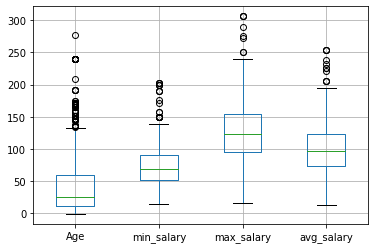

In [16]:
df.boxplot(column = ['Age','min_salary', 'max_salary', 'avg_salary'])

<AxesSubplot:>

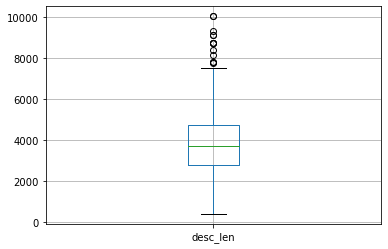

In [17]:
df.boxplot(column = ['desc_len'])

## Check co-linearity and remove multi-colinearity from data
## - with visuals using seaborn
## - with matrix using corr() 

In [19]:
df[['Age','avg_salary','desc_len','Rating']].corr()

,Age,avg_salary,desc_len,Rating
Age,1.000000,0.019574,0.164188,0.023162
avg_salary,0.019574,1.000000,0.078808,0.013492
desc_len,0.164188,0.078808,1.000000,-0.012281
Rating,0.023162,0.013492,-0.012281,1.000000


<AxesSubplot:>

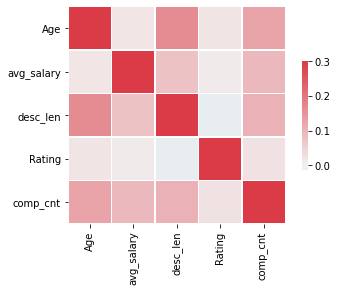

In [32]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Age','avg_salary','desc_len','Rating','comp_cnt']].corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Categorical variable treatment

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'same_state', 'Age', 'Python_R', 'Spark', 'SAS', 'Cloud',
       'Excel', 'job_simplifier', 'seniority', 'State', 'desc_len',
       'comp_cnt'],
      dtype='object')

## list of categorical variables - 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_simplifier', 'seniority', 'State'

Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: Revenue, dtype: int64